In [2]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, RidgeCV, Lasso, ElasticNetCV, LassoCV, Ridge
from sklearn import ensemble
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier

In [18]:
train_clean = pd.read_csv('train_clean_noout.csv')
test_clean = pd.read_csv('test_clean_noout.csv')

In [19]:
train_clean.drop('Unnamed: 0', axis=1, inplace=True)
test_clean.drop('Unnamed: 0', axis=1, inplace=True)

In [20]:
train_clean.dropna(inplace=True)
test_clean.dropna(inplace=True)

In [21]:
train_clean.shape

(640556, 35)

### explore with smaller subsample (to save time)

In [33]:
train_sub = train_clean.sample(frac=0.05)
test_sub = test_clean.sample(frac=0.05)

In [55]:
y=train_sub['log_sale_amt']
features=train_sub.drop(['log_sale_amt'],axis=1) 
X=pd.get_dummies(features, drop_first=True)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state = 42, test_size = 0.2)

In [57]:
X.shape
X_train.shape

(25622, 707)

In [58]:
X_test.shape

(6406, 707)

In [59]:
# remove duplicated columns
X_train = X_train.loc[:,~X_train.columns.duplicated()]
X_test = X_test.loc[:,~X_test.columns.duplicated()]

In [38]:
len(set(X_train.columns))

707

In [53]:
len(set(X_test.columns))

706

In [29]:
#return missing value in a data frame
def missing_value(df):
    nulls = pd.DataFrame(df.isnull().sum().sort_values(ascending=False))
    nulls.columns=['NAs']
    nulls['percentage']=nulls['NAs']/df.shape[0]
    result=nulls.loc[nulls.NAs>0]
    print('Number of features with NAs:',result.shape[0])
    return result

In [30]:
missing_value(train_clean)

Number of features with NAs: 0


,NAs,percentage


In [61]:
#define the evaluation function
def evaluate(model, test_features, test_labels, train_features, train_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('the goodness of fit r square for the train dateset is:',model.score(train_features, train_labels))
    print('the goodness of fit r square for the test dateset is:',r2_score(test_labels, predictions))
    print('the RMSE is: ', np.sqrt(mean_squared_error(test_labels, predictions)))

### Lasso

In [62]:
lasso = LassoCV(alphas = None, max_iter = 50000, cv = 10, normalize = True)
lasso.fit(X_train,y_train)

print('The Lasso lambda is:',lasso.alpha_)
evaluate(lasso,X_test, y_test, X_train, y_train)

The Lasso lambda is: 1.0887919904631298e-05
Model Performance
Average Error: 0.3402 degrees.
Accuracy = 96.97%.
the goodness of fit r square for the train dateset is: 0.662018261947025
the goodness of fit r square for the test dateset is: 0.6598428004929777
the RMSE is:  0.5330403320286945


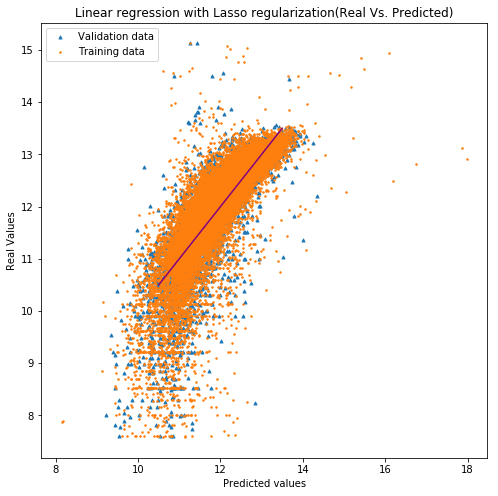

In [66]:
plt.figure(figsize=(8,8))
plt.scatter(lasso.predict(X_test) , y_test,marker = "^", label = "Validation data", s=9) 
plt.scatter(lasso.predict(X_train), y_train,marker = ".", label = 'Training data', s=9)
plt.title("Linear regression with Lasso regularization(Real Vs. Predicted)")
plt.xlabel("Predicted values")
plt.ylabel("Real Values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "purple")
plt.show()

### random forest

In [63]:
base_model = ensemble.RandomForestRegressor(n_estimators = 1500, random_state = 42, max_features=
                                           400, max_depth=7)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test, X_train, y_train)

Model Performance
Average Error: 0.2498 degrees.
Accuracy = 97.74%.
the goodness of fit r square for the train dateset is: 0.7638030768814604
the goodness of fit r square for the test dateset is: 0.7382610658079403
the RMSE is:  0.4675783584447282


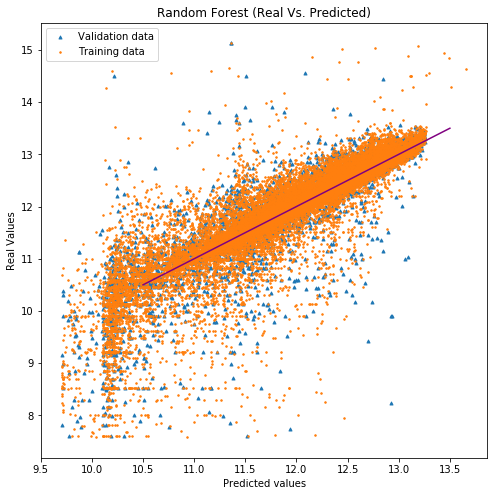

In [64]:
plt.figure(figsize=(8,8))
plt.scatter(base_model.predict(X_test) , y_test,marker = "^", label = "Validation data", s=9) 
plt.scatter(base_model.predict(X_train), y_train,marker = ".", label = 'Training data', s=9)
plt.title("Random Forest (Real Vs. Predicted)")
plt.xlabel("Predicted values")
plt.ylabel("Real Values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "purple")
plt.show()

### XGboost

In [42]:
model = XGBRegressor(learning_rate=0.04, max_depth=6, n_estimators=500)
model.fit(X_train,y_train)
XGboost_accuracy = evaluate(model, X_test, y_test, X_train, y_train)

Model Performance
Average Error: 0.2351 degrees.
Accuracy = 97.89%.
the goodness of fit r square for the train dateset is: 0.8383537353803258
the goodness of fit r square for the test dateset is: 0.7652359669659579
the RMSE is:  0.44282896301545815


In [43]:
model = XGBRegressor(learning_rate=0.02, max_depth=6, n_estimators=500)
model.fit(X_train,y_train)
XGboost_accuracy = evaluate(model, X_test, y_test, X_train, y_train)

Model Performance
Average Error: 0.2350 degrees.
Accuracy = 97.89%.
the goodness of fit r square for the train dateset is: 0.8246808962124222
the goodness of fit r square for the test dateset is: 0.7648795963219618
the RMSE is:  0.4431649416509669


In [44]:
model = XGBRegressor(learning_rate=0.02, max_depth=4, n_estimators=800)
model.fit(X_train,y_train)
XGboost_accuracy = evaluate(model, X_test, y_test, X_train, y_train)

Model Performance
Average Error: 0.2411 degrees.
Accuracy = 97.83%.
the goodness of fit r square for the train dateset is: 0.7893797585530298
the goodness of fit r square for the test dateset is: 0.7595299235086997
the RMSE is:  0.4481782307932615


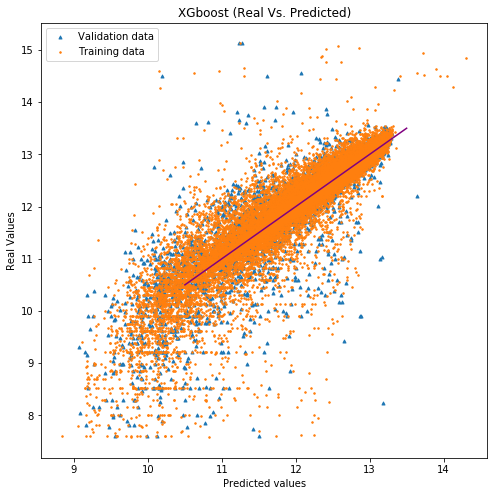

In [65]:
plt.figure(figsize=(8,8))
plt.scatter(model.predict(X_test) , y_test,marker = "^", label = "Validation data", s=9) 
plt.scatter(model.predict(X_train), y_train,marker = ".", label = 'Training data', s=9)
plt.title("XGboost (Real Vs. Predicted)")
plt.xlabel("Predicted values")
plt.ylabel("Real Values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "purple")
plt.show()

### Classification

In [45]:
y=train_sub['distressed_sale_flg']
features=train_sub.drop(['log_sale_amt','distressed_sale_flg'],axis=1) 
X=pd.get_dummies(features, drop_first=True)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state = 42, test_size = 0.2)

In [47]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.956365623292483

In [48]:
clf.score(X_test,y_test)

0.9553543552919138

Text(0,0.5,'Feature')

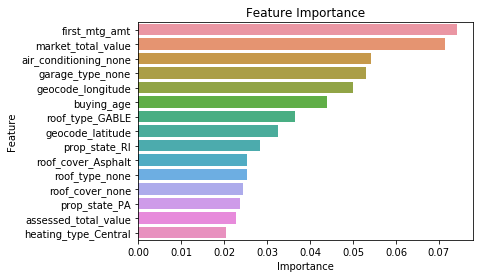

In [49]:
#new plot for random forest
imp = pd.DataFrame({'Variable':X_train.columns,
              'Importance':clf.feature_importances_}).sort_values('Importance', ascending=False)

sns.barplot(x='Importance', y='Variable', data=imp.head(15))
plt.title('Feature Importance')
plt.ylabel('Feature')

### different states

### MA

In [26]:
train_ma = train_sub[train_sub['prop_state']=='MA']

In [27]:
y=train_ma['log_sale_amt']
features=train_ma.drop(['log_sale_amt'],axis=1) 
X=pd.get_dummies(features, drop_first=True)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state = 42, test_size = 0.2)

In [29]:
X.shape
X_train.shape

(2380, 98)

In [30]:
#Lasso
lasso = LassoCV(alphas = None, max_iter = 50000, cv = 10, normalize = True)
lasso.fit(X_train,y_train)
print('The Lasso lambda is:',lasso.alpha_)
evaluate(lasso,X_test, y_test, X_train, y_train)

The Lasso lambda is: 0.00020322867154445943
Model Performance
Average Error: 0.4047 degrees.
Accuracy = -inf%.
the goodness of fit r square for the train dateset is: 0.5094793301075717
the goodness of fit r square for the test dateset is: 0.21235550599662933
the RMSE is:  1.0719268706152447


In [35]:
#random
base_model = ensemble.RandomForestRegressor(n_estimators = 1000, random_state = 42, max_features=
                                           70, max_depth=5)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test, X_train, y_train)

Model Performance
Average Error: 0.3355 degrees.
Accuracy = -inf%.
the goodness of fit r square for the train dateset is: 0.7165211157273551
the goodness of fit r square for the test dateset is: 0.24397857582261773
the RMSE is:  1.050188089276992


In [34]:
model = XGBRegressor(learning_rate=0.001, max_depth=6, n_estimators=500)
model.fit(X_train,y_train)
XGboost_accuracy = evaluate(model, X_test, y_test, X_train, y_train)

Model Performance
Average Error: 7.2916 degrees.
Accuracy = -inf%.
the goodness of fit r square for the train dateset is: -76.49546342506626
the goodness of fit r square for the test dateset is: -35.79341250974032
the RMSE is:  7.326306300745824
